In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
data1 = pd.read_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Dataset_medio_limpio_filtrado2.csv')

# Leer el dataset en un DataFrame
from io import StringIO
data2 = pd.read_csv(StringIO(data1.to_csv(index=False)))

In [5]:
data2

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_code
0,Influenza,1,1,19,1,0,1,1,0
1,Influenza,1,1,25,1,1,1,1,0
2,Asthma,1,1,28,0,2,1,1,3
3,Asthma,1,1,30,1,1,1,1,3
4,Influenza,1,0,30,0,2,1,1,0
5,Influenza,1,1,30,1,1,1,1,0
6,Migraine,1,0,31,1,1,1,1,18
7,Pneumonia,1,1,32,1,2,1,1,31
8,Asthma,1,1,35,0,1,1,1,3
9,Migraine,0,0,35,0,2,2,1,18


In [7]:
# Extraer un registro de cada disease para el test
test = data2.groupby('Disease').apply(lambda x: x.sample(1, random_state=0))
test

/var/folders/lc/cn6xmxf12t7dsv68rh0xyp7w0000gn/T/ipykernel_9452/1918444084.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = data2.groupby('Disease').apply(lambda x: x.sample(1, random_state=0))


,,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_code
Disease,,,,,,,,,,
Asthma,25,Asthma,1,1,60,1,2,2,1,3
Diabetes,18,Diabetes,1,0,45,1,2,2,1,7
Hypertension,26,Hypertension,0,0,60,1,2,1,1,35
Influenza,4,Influenza,1,0,30,0,2,1,1,0
Migraine,10,Migraine,1,0,35,0,2,2,1,18
Pneumonia,14,Pneumonia,1,1,40,1,1,2,1,31


In [9]:
test.columns

Index(['Disease', 'Fever', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',
       'Disease_code'],
      dtype='object')

In [12]:
print(test.index)
print('-------')
print(data2.index)

MultiIndex([(      'Asthma', 25),
            (    'Diabetes', 18),
            ('Hypertension', 26),
            (   'Influenza',  4),
            (    'Migraine', 10),
            (   'Pneumonia', 14)],
           names=['Disease', None])
-------
RangeIndex(start=0, stop=31, step=1)


In [13]:
# Crear una nueva columna 'nuevo_indice' con valores desde 0 hasta la longitud de data2 - 1
data3 = data2.copy()
data3['nuevo_indice'] = range(len(data3))

# Establecer 'nuevo_indice' como el índice de data2
data3.set_index('nuevo_indice', inplace=True)

print(data3.index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int64', name='nuevo_indice')


In [15]:
print(test.index)
print('-------')
print(data3.index)

MultiIndex([(      'Asthma', 25),
            (    'Diabetes', 18),
            ('Hypertension', 26),
            (   'Influenza',  4),
            (    'Migraine', 10),
            (   'Pneumonia', 14)],
           names=['Disease', None])
-------
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int64', name='nuevo_indice')


In [19]:
# Crear una nueva columna 'nuevo_indice' con valores desde 0 hasta la longitud de data2 - 1
test2 = test.copy()
test2['nuevo_indice'] = [25, 18, 26, 4, 10, 14]

# Establecer 'nuevo_indice' como el índice de data2
test2.set_index('nuevo_indice', inplace=True)

print(test2.index)

Index([25, 18, 26, 4, 10, 14], dtype='int64', name='nuevo_indice')


In [20]:
# Crear el dataset de entrenamiento
train = data3.drop(test2.index)
train

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_code
nuevo_indice,,,,,,,,,
0,Influenza,1,1,19,1,0,1,1,0
1,Influenza,1,1,25,1,1,1,1,0
2,Asthma,1,1,28,0,2,1,1,3
3,Asthma,1,1,30,1,1,1,1,3
5,Influenza,1,1,30,1,1,1,1,0
6,Migraine,1,0,31,1,1,1,1,18
7,Pneumonia,1,1,32,1,2,1,1,31
8,Asthma,1,1,35,0,1,1,1,3
9,Migraine,0,0,35,0,2,2,1,18


In [21]:
# Exportar los datasets de entrenamiento y test
train.to_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Train.csv', index=False)
test2.to_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Test.csv', index=False)

In [22]:
train.columns

Index(['Disease', 'Fever', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',
       'Disease_code'],
      dtype='object')

In [23]:
test2.columns

Index(['Disease', 'Fever', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',
       'Disease_code'],
      dtype='object')

In [24]:
import sklearn
print(sklearn.__version__)
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

1.5.0


In [25]:
# Cargar los datasets de entrenamiento y test
trainCV = pd.read_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Train.csv')
testCV = pd.read_csv('/Users/carolinasv/Documents/VS_Code/pulsera_inteligente/Datasets/Procesados/Test.csv')

In [26]:
# Crear los datasets de entrenamiento y test
trainCV2 = trainCV.copy()
testCV2 = testCV.copy()
X_train = trainCV2.drop(['Disease', 'Disease_code', 'Outcome Variable'], axis=1)
y_train = trainCV2['Disease']
X_test = testCV2.drop(['Disease', 'Disease_code', 'Outcome Variable'], axis=1)
y_test = testCV2['Disease']

In [27]:
# Crear el clasificador
arbol = DecisionTreeClassifier(random_state=0)

In [28]:
# Entrenar el clasificador
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
# Predecir los valores de test
y_pred = arbol.predict(X_test)

In [30]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

In [31]:
# Calcular la precisión por nivel de profundidad
accuracy_depth = []
for i in range(1, 10):
    arbol = DecisionTreeClassifier(random_state=0, max_depth=i)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_depth.append(accuracy)
    print(f'Precisión con profundidad {i}: {accuracy}')

Precisión con profundidad 1: 0.3333333333333333
Precisión con profundidad 2: 0.5
Precisión con profundidad 3: 0.5
Precisión con profundidad 4: 0.3333333333333333
Precisión con profundidad 5: 0.3333333333333333
Precisión con profundidad 6: 0.3333333333333333
Precisión con profundidad 7: 0.5
Precisión con profundidad 8: 0.5
Precisión con profundidad 9: 0.5


In [32]:
# Crear un DataFrame con la precisión por nivel de profundidad
profundidadM = pd.DataFrame(accuracy_depth, columns=['Accuracy'])

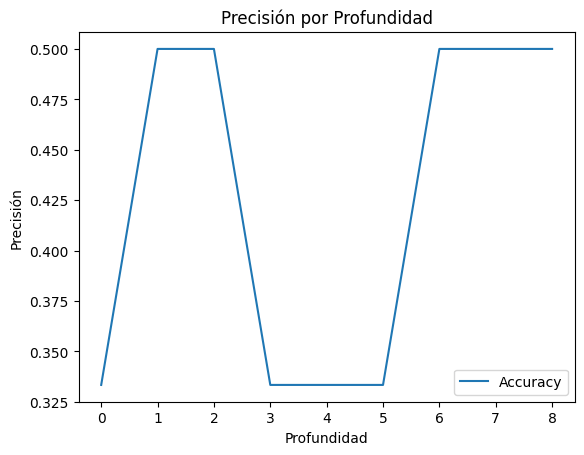

In [33]:
# Crear un gráfico de la precisión por nivel de profundidad
profundidadM.plot()
plt.xlabel('Profundidad')
plt.ylabel('Precisión')
plt.title('Precisión por Profundidad')
plt.show()


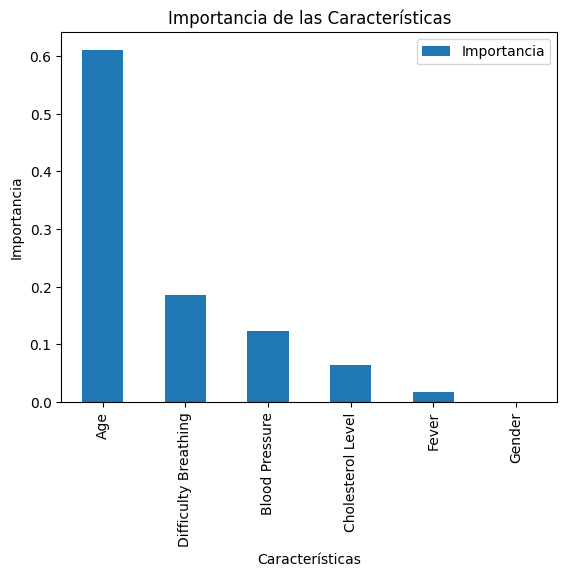

In [35]:
# Crear un gráfico de la importancia de las características
importancias = arbol.feature_importances_
caracteristicas = X_train.columns
importanciasM = pd.DataFrame(importancias, index=caracteristicas, columns=['Importancia'])
importanciasM = importanciasM.sort_values(by='Importancia', ascending=False)
importanciasM.plot(kind='bar')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características')
plt.show()


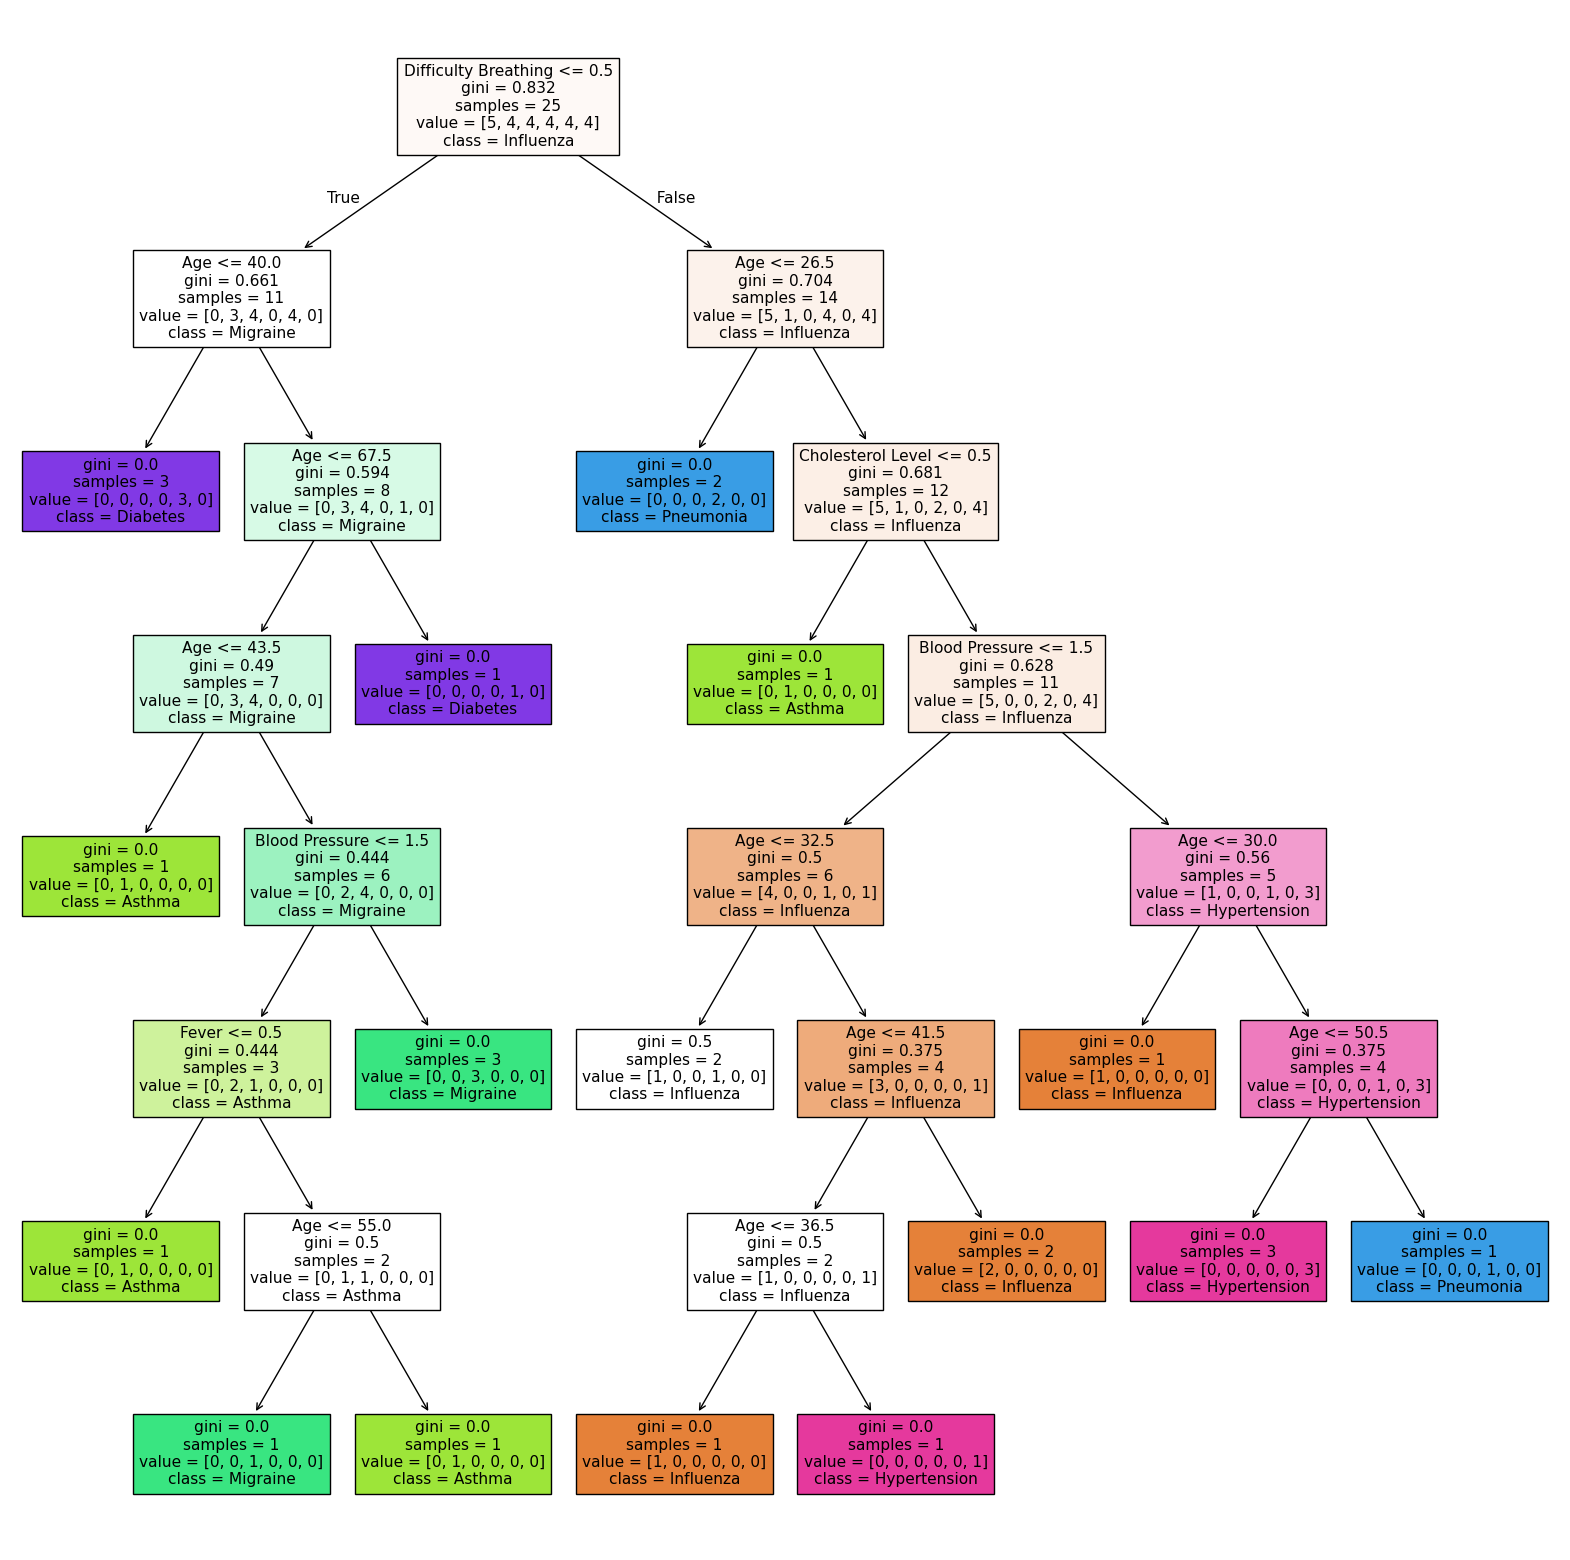

In [34]:
# Mostrar el arbol de decisiones
plt.figure(figsize=(20, 20))
plot_tree(arbol, filled=True, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [40]:
# Ajustar la precisión del modelo a 2 capas de profundidad
arbol = DecisionTreeClassifier(random_state=0, max_depth=2)
arbol.fit(X_train, y_train)
y_pred = arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con profundidad 1: {accuracy}')

Precisión con profundidad 1: 0.5


In [41]:
# Guardar el modelo en un archivo
import joblib
joblib.dump(arbol, 'prediccion_enfermedad2.joblib')

['prediccion_enfermedad2.joblib']